In [89]:
from __future__ import division
import argparse
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np


path = "/home/houwaart/Projects/FoldChange_vs_Affinity/CELF1/"
filen = "ENCFF002DEB.tsv"
fpath = path + filen

affs = {}

with open(fpath) as f:
    for i, line in enumerate(f):
        if i > 1:
            a = line.rstrip().split("\t")
            affs[a[0]] = float(a[4])

saffs = [affs[i] for i in affs]
models = ['a','b','c','d']


print affs
#print saffs





{'GGGCTT': 0.765946, 'GAACGT': 0.995613, 'CTTCTT': 1.271099, 'CACCCT': 0.853281, 'ATTGAA': 0.825217, 'GAACGG': 0.671906, 'GAACGC': 0.715584, 'GAACGA': 0.661275, 'CACCCA': 0.796053, 'CTTCTA': 1.033176, 'CACCCC': 0.847436, 'CTTCTC': 1.080348, 'CACCCG': 0.741576, 'CTTCTG': 1.130823, 'CGTGTG': 1.98521, 'TAAGGT': 0.983989, 'CGTGTC': 2.382083, 'CGTGTA': 1.906339, 'AGGCAA': 0.677096, 'GGAAAT': 0.690987, 'TAAGGG': 0.776374, 'CGTGTT': 2.363607, 'TAAGGC': 0.737134, 'TAAGGA': 0.703787, 'GTCAAA': 1.566784, 'GTCAAC': 1.434414, 'GTCAAG': 1.482799, 'CTGTCC': 2.23136, 'TCAGAG': 0.811505, 'CTGTCA': 1.864289, 'CTGTCG': 1.343979, 'GTATCT': 1.527544, 'TCAGAA': 0.78601, 'GTCAAT': 1.857734, 'GATGAA': 0.699656, 'GTATCA': 1.36163, 'GTATCC': 1.318564, 'GTATCG': 1.205781, 'CTGTCT': 2.674833, 'GGTGTC': 1.488986, 'GGTGTA': 1.330649, 'GGTGTG': 1.344017, 'TATCCT': 1.127037, 'CCGGGG': 0.828204, 'TTCTGT': 2.598198, 'GCCTTC': 0.947212, 'CCGGGC': 0.766739, 'CCGGGA': 0.769055, 'TATCCA': 1.021499, 'AGGCAG': 0.738784, 'TA

In [90]:
def e_step(data, theta):
    global models
    ez = {}
    for i in models:
        gf[i] = norm(loc = theta[i][0], scale=theta[i][1])
        ez[i] = []
    for x in data:
        den = 0
        for i in models:
            den += gf[i].pdf(x)
        
        for i in models:
            ez[i].append(gf[i].pdf(x)/den)
            
    #print ez
    return ez

def m_step(data, ez):
    global models
    th = {}
    for m in models:
        th[m] = [0.0,0.0]
    
    num = 0.0
    den = 0.0
    for m in models:
        for i, x in enumerate(data):
            num += ez[m][i]*x
            den += ez[m][i]
        th[m][0] = num/den
        num = 0.0
        for i, x in enumerate(data):
            num += ez[m][i]*(x - th[m][0])**2
        th[m][1] = (num/(den-1))**(1/2)
    
    return th
        

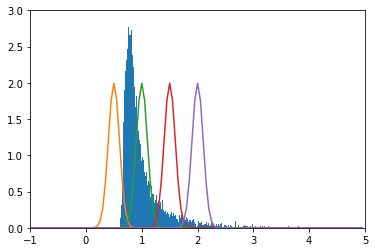

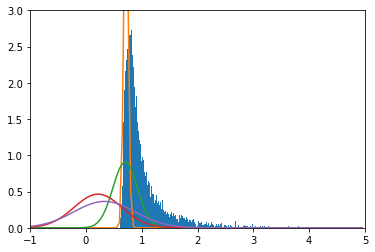

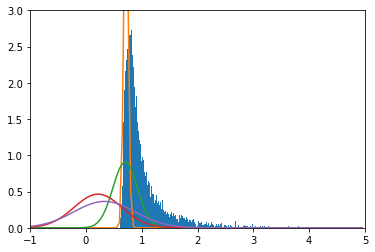

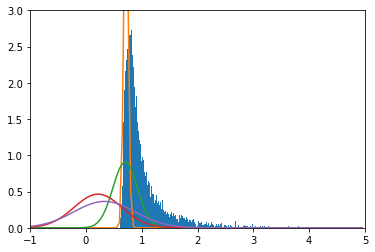

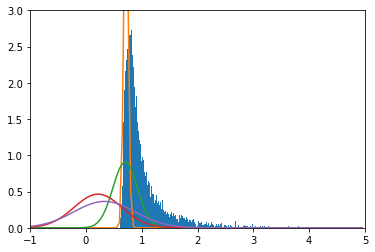

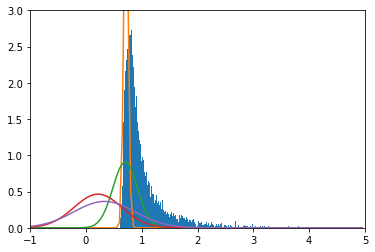

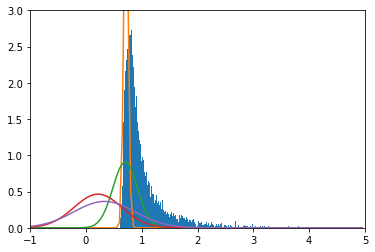

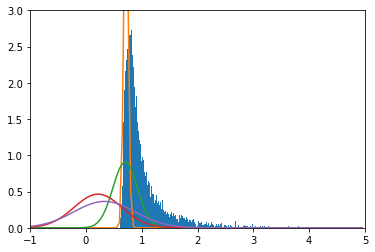

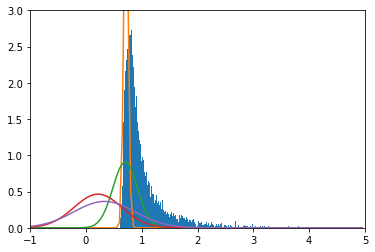

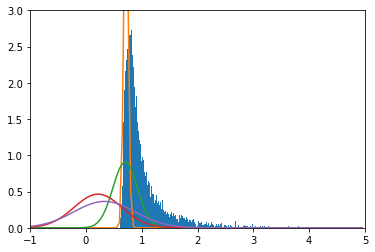

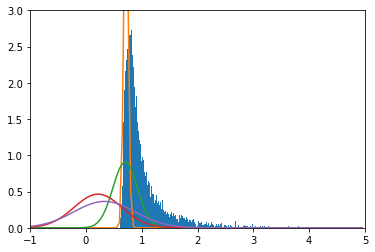

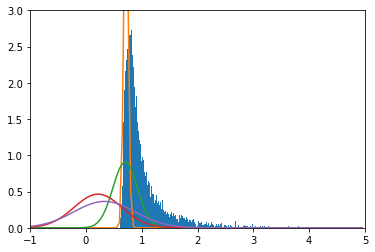

{'a': [0.71510007747632742, 0.039749572478615464], 'c': [0.21519038216114497, 0.42930348463762574], 'b': [0.701827797664618, 0.21947127460090496], 'd': [0.3310003068100385, 0.54789367241030607]}


In [99]:
# let's model this as three specific RRMs and one unspecific RRM 
# via Gaussians
x = np.arange(-1,5, 0.05)
th = {}

for i in models:
    th[i] = [0, 0.1]
    
th['a'][0] = 0.5
th['b'][0] = 1.0
th['c'][0] = 1.5
th['d'][0] = 2.0

gf = {}

for i in models:
    gf[i] = norm(loc = th[i][0], scale=th[i][1])
plt.hist(saffs,200,normed=True)
plt.axis([-1, 5, 0, 3])
for i in models:
    plt.plot(x,gf[i].pdf(x)/2)
plt.show()


rounds = 10
for r in range(rounds+1):
    ez = e_step(saffs,th)
    cth = m_step(saffs,ez)

    for i in models:
        gf[i] = norm(loc = cth[i][0], scale=cth[i][1])
    plt.hist(saffs,200,normed=True)
    plt.axis([-1, 5, 0, 3])
    for i in models:
        plt.plot(x,gf[i].pdf(x)/2)
    plt.show()
    

print cth

In [92]:
np.argwhere(np.isinf(saffs))
np.argwhere(max(saffs))
max(saffs)


4.35517